# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
1. What percentage of total population is using the bike share system? 
2. Which station is most popular in the city. 
3. What is the minimum and maximum distance people travel using bike? 
4. What is the annual income of the Motivate? 
5. How many mens use bike share system? 
6. how many women use bike share system? 
> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [81]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [82]:
def print_first_point(filename): #returns first and second row containing coumn names and values respectively
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in: # opens a file
        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)   
    # return city name and first trip 
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [83]:
def duration_in_mins(datum, city):  #Converts all the trip duration from each city to minutes
    if city == 'Chicago' or city == 'NYC':
        minutes = float(datum['tripduration'])
        duration = minutes/(60)
    elif city == 'Washington':  
        minutes = float(datum['Duration (ms)'])
        duration = (minutes/(1000*60))
    return duration
# The `example_trips` dictionary is obtained from when we printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}
for city in tests:
    print(duration_in_mins(example_trips[city], city))
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

13.983333333333333
15.433333333333334
7.123116666666666


In [84]:
def time_of_trip(datum, city): #Returns month, hour and day of week for a particular trip
    """datum == Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made."""
    
    if city == 'NYC':
        str_f = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M:%S") #strptime() is used to convert the string values into appropriate data type
        #print(str_f)
        hour = str_f.hour #hour is obtained from given datetime format
        day_of_week = datetime.strftime(str_f, "%A") #day in text format is obtained from given datetime format
        month = str_f.month #month is obtained from given datetime format
    elif city == 'Chicago' :
        str_t = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
        #print(str_t)
        hour = str_t.hour
        day_of_week = datetime.strftime(str_t, "%A")
        month = str_t.month
    elif city == 'Washington' :
        str_j = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
        #print(str_j)
        hour = str_j.hour
        day_of_week = datetime.strftime(str_j, "%A")
        month = str_j.month

    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}
for city in tests:
    print(time_of_trip(example_trips[city], city))
    assert time_of_trip(example_trips[city], city) == tests[city]

(1, 0, 'Friday')
(3, 23, 'Thursday')
(3, 22, 'Thursday')


In [85]:
def type_of_user(datum, city): #Returns type of user
    """Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip. """
        
    if city == 'NYC' or city == 'Chicago':  #Checks the user type for NYC and Chicago city
        user_type = datum['usertype']
    elif city == 'Washington':              #Checks the user type for Washington and replaced their type as Subscriber and Customer
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'
    return user_type

tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    print(type_of_user(example_trips[city], city))
    assert type_of_user(example_trips[city], city) == tests[city]

Customer
Subscriber
Subscriber


**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [86]:
def condense_data(in_file, out_file, city):
    """This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed."""
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # A csv DictWriter object set which requires column names for the first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        trip_reader = csv.DictReader(f_in) # csv DictReader object is set
        # collect data from  each function and processed each row
        for row in trip_reader:
            new_point = {} 
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = time_of_trip(row,city)[0]
            new_point['hour'] = time_of_trip(row,city)[1]
            new_point['day_of_week'] = time_of_trip(row,city)[2]
            new_point['user_type'] = type_of_user(row, city)
            ## the processed information is written to the output file.
            trip_writer.writerow(new_point)            

In [87]:
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: **'NYC'** city has the highest number of trips which is equal to **276798**, as other cities like **Washington** and **Chicago** has **66326**, **72131** number of trips respectively.
Also **'NYC'** city has the highest proportion of trips made by subscribers Which is equal to **245896**,and as compared to the cities **Washington** and **Chicago** which has **51753** and **54982** number of trips made by __Subscribers__ 
and **'NYC'** city has the highest proportion of trips made by short-term customers which is equal to **30902** which is the highest as compared to **Washington** and **Chicago** which has **14573** and **17149** number of trips made by __Customers__. 

In [91]:
def number_of_trips(filename, city):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        n_trip = 0
        # tally up ride types
        for row in reader:
            n_trip += 1
            user = type_of_user(row, city)
            if user == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1

        # compute total number of rides
        n_total = n_subscribers + n_customers

        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##


In [92]:
city_raw = {'Washington': './data/Washington-CapitalBikeshare-2016.csv',
             'Chicago': './data/Chicago-Divvy-2016.csv',
             'NYC': './data/NYC-CitiBike-2016.csv'}

for city, data_file in city_raw.items():
    n_subscribers, n_customers, n_total = number_of_trips(data_file, city)
    print(number_of_trips(data_file, city))

(51753, 14573, 66326)
(54982, 17149, 72131)
(245896, 30902, 276798)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: So from the output of the below written code we can conclude that In __'NYC' city__ , the average trip length is approximately __15 minutes__, and __7.32 %__ of trips are more than 30 minutes and for __'Chicago' city__ the average trip length is approximately __16 minutes__, and __8.35 %__ of trips are more than 30 minutes and for __'Washington' city__ the average trip length is approximately __18 minutes__, and __10.84 %__ of trips are more than 30 minutes.

In [93]:
import csv
def trp_duration(filename):

    total_of_duration = 0 #Stores total trip duration for the particular city
    above_30 = 0  #Count of trips having trip durations more than 30 minutes
    below_30 = 0  ##Count of trips having trip durations less than 30 minutes
    total = 0  #tota
    
    city = filename.split('-')[0].split('/')[-1]
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:
            total += 1
            if city == 'NYC' or city == 'Chicago':
                total_of_duration += int(row['tripduration'])
                if int(row['tripduration'])>=1800:
                    above_30 +=1
                else:
                    below_30 +=1
                avg_above_30 = round((above_30/total)*100, 2)
                avg_duration = round((total_of_duration/total)/60, 2)   
            elif city == 'Washington':
                total_of_duration += int(row['Duration (ms)'])
                if int(row['Duration (ms)']) >=1800000:
                    above_30 +=1
                else:
                    below_30 +=1
                avg_above_30 = round((above_30/total)*100,2)
                avg_duration =  round((total_of_duration/total)/(1000*60), 2)    
            
    return (city, total, avg_above_30, avg_duration)
        

data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv']
for data_file in data_files:
    city, total, over_30, avg_duration  = trp_duration(data_file)
    print(trp_duration(data_file))

('NYC', 276798, 7.32, 15.81)
('Chicago', 72131, 8.35, 16.56)
('Washington', 66326, 10.84, 18.93)


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: So from the output of the below written code we can conclude that In __NYC city__ , __Customers__ takes longer rides as compared with the Subscribers. (Also If checked with other cities its kind of same condition.)

In [95]:
def user_ride_duration(filename, city): #Calculates average trip duration for both subscriber and customers
    
    total_of_duration = 0  #Stores total duration of trip for both subscribers and customers
    Sub_duration = 0  #Stores trip duration for subscribers
    Cus_duration = 0  #Stores trip duration for Customers
    num_sub = 0  #Number of Subscribers
    num_cust = 0 #Number of Customers
    total = 0  #Total subscribers and customers
    
    city = filename.split('-')[0].split('/')[-1]
    with open(filename, 'r') as f_in:
        
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:
            user = type_of_user(row, city)
            total_of_duration += int(row['tripduration'])
            if user == 'Subscriber':
                num_sub += 1
                Sub_duration += int(row['tripduration']) 
            elif user == 'Customer':
                num_cust += 1
                Cus_duration += int(row['tripduration'])   
        Sub_duration = Sub_duration/60
        Cus_duration = Cus_duration/60
        avg_Subs = round((Sub_duration/num_sub), 2) #Average Trip duration for Subscribers
        avg_Cust = round((Cus_duration/num_cust), 2) #Average Trip duration for Customers

    return (city,num_sub,num_cust, total_of_duration, avg_Subs, avg_Cust)
        

data_files = ['./data/NYC-CitiBike-2016.csv']
city = 'NYC'
for data_file in data_files:
    city,num_sub,num_cust,total_of_duration,avg_Subs, avg_Cust = user_ride_duration(data_file, city)
    print(user_ride_duration(data_file, city))

('NYC', 245896, 30185, 262613647, 13.68, 32.98)


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data, bins = 5)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

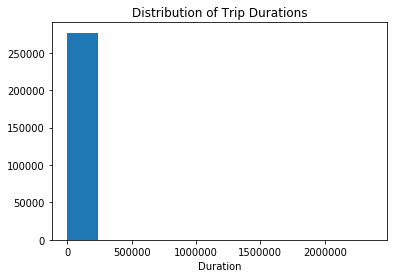

In [97]:
def histog(file):
    data = [] #Empty list to store trip duation 
    with open(file, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader :
            value = float(row['tripduration']) #Stores the trip duration for that particular row in the value
            data.append (value) #Output of value is appended to the data list
    return data 
file = './data/NYC-CitiBike-2016.csv'
plt.hist(histog(file))
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration')
plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Below printed Histogram shows the distribution of trip times for 'Subscribers' and 'Customers' in the __'NYC' city__. From the below printed Histograms we can conclude that, Both the histograms are __Right Skewed__ and The __peak for 'Subscriers' trip duration is between 0 to 15 mins__ and For __'Customers' it is between 15 to 30 mins__. From this we can say that, average trip duration for 'Customers' is higher than the 'Subscribers'.

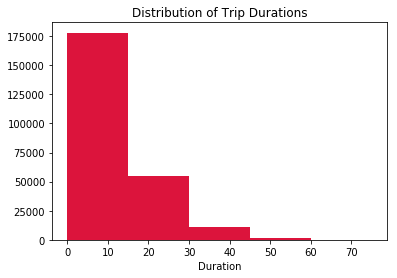

In [100]:
def NYC_sub(filename, city):
    value = []  #Empty list to store trip duration greater than 75 min for subscribers
    with open(filename,'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:
            user = type_of_user(row, city)
            if user == 'Subscriber' and float(row['tripduration'])/60 < 75 : 
                data = float(row['tripduration'])/60   #Value of tripduration that particular row is stored in data
                value.append(data)   #Output of data is appended to the value list
    return value 
filename = './data/NYC-CitiBike-2016.csv'
city = 'NYC'
bins = [0,15,30,45,60,75]     
plt.hist(NYC_sub(filename, city),bins, histtype='bar', color = 'crimson') #Plots histogram
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration')
plt.show()    


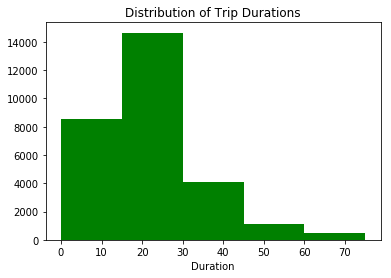

In [102]:
def NYC_sub(filename, city):
    value = [] #Empty list to store trip duration greater than 75 min for customers
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:
            user = type_of_user(row, city)
            if user == 'Customer' and float(row['tripduration'])/60 < 75 :
                data = float(row['tripduration'])/60  #Value of tripduration that particular row is stored in data
                value.append(data)   #Output of data is appended to the value list
    return value 
filename = './data/NYC-CitiBike-2016.csv'
bins = [0,15,30,45,60,75]
city = 'NYC'
plt.hist(NYC_sub(filename, city), bins,  histtype='bar', color = 'g')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration')
plt.show()    


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: __Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?__

From the output generated by the below written function we can conclude that the pattern of __ridership is different on week-ends and week-days for 'Subscribers'__ but it is __almost same for the 'Customers'__. 'Subscribers' most probably use the service on week-ends while 'Customers' use it as and when possible as there is very little difference in their average use in week-days and week-ends. So the average duration of rides change depending on the day of the week for 'Subscriber', but not for the 'Customer'. We can analyze this from the histogram below.

In [ ]:
def ridership_pattern(file, city):
    weekends = ['Saturday', 'Sunday']
    duration_weekends_s = 0  #total duration of subscribers on weekend
    duration_weekends_c = 0  #total duration of Customers on weekend
    duration_weekdays_s = 0  #total duration of Subscriber on weekday
    duration_weekdays_c = 0  #total duration of Customers on weekday
    count_weekends_s = 0     #total trip count of Subscribers on weekend
    count_weekends_c = 0     #total trip count of Customers on weekend
    count_weekdays_s = 0     #total trip count of Subscribers on weekday
    count_weekdays_c = 0     #total trip count of Customers on weekday
    with open(file, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader :
            day = time_of_trip(row,city)[2]
            user = type_of_user(row,city)
            duration = duration_in_mins(row, city)
            if user == 'Subscriber':
                if day in weekends:
                    duration_weekends_s += duration
                    count_weekends_s += 1
                else:
                    duration_weekdays_s += duration
                    count_weekdays_s += 1
            else:
                if day in weekends:
                    duration_weekends_c += duration
                    count_weekends_c += 1
                else:
                    duration_weekdays_c += duration
                    count_weekdays_c += 1
        avg_weekends_s = duration_weekends_s/count_weekends_s  # Average tripduration of Subscribers on weekends
        avg_weekdays_s = duration_weekdays_s/count_weekdays_s  # Average tripduration of Subscribers on weekdays
        avg_weekends_c = duration_weekends_c/count_weekends_c  # Average tripduration of Customers on weekends
        avg_weekdays_c = duration_weekdays_c/count_weekdays_c  # Average tripduration of Customers on weekdays
        return avg_weekends_s, avg_weekdays_s, avg_weekends_c, avg_weekdays_c
    
file = './data/NYC-CitiBike-2016.csv'
city = 'NYC'
print(ridership_pattern(file, city))
Subs_cus = [ridership_pattern(file, city)[0], ridership_pattern(file, city)[1],ridership_pattern(file, city)[2], ridership_pattern(file, city)[3]]
Customers = [1,2,3,4]
labels = ['Weekend_subs', 'Weekday_subs','Weekend_cust', 'Weekday_cust']
plt.bar(Customers,Subs_cus, tick_label = labels ) #plots hostograms for all the output variables

plt.title('Distribution of Ridership Trip Durations on weekdays and weekends')
plt.xlabel('Rider')
plt.ylabel('Average trip duration')
plt.show()  

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to apply Data analysis techniques in __Women's Safety issues__, In which will extract the safer routes to travel by verifying the the crime history in that route and time of the day to travel safely that a particular area.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.